# Linear Regression (Moore's Law)

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
!nvidia-smi -L
print(f'Tensorflow version: {tf.__version__}')

GPU 0: GeForce RTX 2080 Ti (UUID: GPU-3cb47403-efa9-71ae-1700-c27de6cb0d0a)
Tensorflow version: 2.3.1


In [3]:
data = pd.read_csv('data/moore.csv').to_numpy()
X = data[:, 0].reshape(-1, 1)
y = data[:, 1]
X = X - X.mean()
y = np.log(y)

Epoch 1/100
6/6 [==============================] - 0s 992us/step - loss: 332.9912
Epoch 2/100
6/6 [==============================] - 0s 909us/step - loss: 295.8638
Epoch 3/100
6/6 [==============================] - 0s 992us/step - loss: 263.2344
Epoch 4/100
6/6 [==============================] - 0s 992us/step - loss: 197.4203
Epoch 5/100
6/6 [==============================] - 0s 909us/step - loss: 175.3038
Epoch 6/100
6/6 [==============================] - 0s 909us/step - loss: 181.1018
Epoch 7/100
6/6 [==============================] - 0s 992us/step - loss: 129.4409
Epoch 8/100
6/6 [==============================] - 0s 992us/step - loss: 114.9732
Epoch 9/100
6/6 [==============================] - 0s 992us/step - loss: 81.1907
Epoch 10/100
6/6 [==============================] - 0s 909us/step - loss: 61.5480
Epoch 11/100
6/6 [==============================] - 0s 909us/step - loss: 31.6261
Epoch 12/100
6/6 [==============================] - 0s 909us/step - loss: 25.7740
Epoch 13/100
6/6 

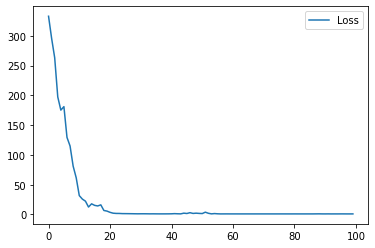

In [4]:
i = tf.keras.layers.Input(shape=(1,))
x = tf.keras.layers.Dense(1)(i)
model = tf.keras.models.Model(i, x)

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9),
              loss='mse')
scheduler = tf.keras.callbacks.LearningRateScheduler(lambda x: 0.001 if x < 50 else 0.0001)

r = model.fit(X, y,
              epochs=100,
              callbacks=[scheduler])

plt.plot(r.history.get('loss'), label='Loss')
plt.legend()
plt.show()

Time to double: 2.0863325557936645


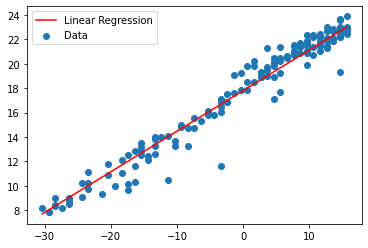

In [5]:
a = model.layers[1].get_weights()[0][0, 0]
print(f'Time to double: {np.log(2) / a}')

X_hat = np.linspace(X.min(), X.max(), 100)
y_hat = model.predict(X_hat.reshape(-1, 1))
plt.scatter(X.flatten(), y, label='Data')
plt.plot(X_hat, y_hat, color='red', label='Linear Regression')
plt.legend()
plt.show()